Goal of this iteration is to learn an accurate predictive model of all input variables, in as little wall clock time as possible

- Use a better optimiser (ADAM)


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch

env = gym.make('CartPole-v1')

print("Action Space: ", env.action_space)
print("Obs Space: ", env.observation_space)


SEED = 0
torch.manual_seed(SEED)


Action Space:  Discrete(2)
Obs Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [172]:
# Input -> state, action

# Output (all_preds)
# reward_model(state, action) -> reward
# env_model(state, action) -> next_state, done
# q_value(state, action) -> val
# policy(state) -> next_action

W = torch.normal(0,1,size=(5,8)) # reward (1), next_state (4), done (1), val (1), next_action (1)

loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam([W], lr=0.1, amsgrad=False)
optimizer = torch.optim.SGD([W], lr=0.1)

params = [W]


print(W)

W[:,2] = torch.tensor([0, 1, 0, 0, 0.19])

print(W)

for p in params:
    p.requires_grad = True


tensor([[ 0.5967,  1.0025, -0.8205,  0.5092,  0.9514,  0.7737, -2.1447,  0.0441],
        [ 1.2906,  0.6649,  0.5307, -0.4232, -0.3887,  0.3332,  0.2937, -0.1575],
        [-0.3722,  2.0837,  1.1260,  0.5749,  0.9157, -0.2397,  0.7071,  0.9646],
        [-1.4960,  0.0182,  0.3456,  0.0312,  0.4004,  0.4258,  0.8395,  1.2389],
        [ 0.5239, -1.6584,  0.5483, -1.3983, -1.9764,  1.2325, -0.5456, -0.0694]])
tensor([[ 0.5967,  1.0025,  0.0000,  0.5092,  0.9514,  0.7737, -2.1447,  0.0441],
        [ 1.2906,  0.6649,  1.0000, -0.4232, -0.3887,  0.3332,  0.2937, -0.1575],
        [-0.3722,  2.0837,  0.0000,  0.5749,  0.9157, -0.2397,  0.7071,  0.9646],
        [-1.4960,  0.0182,  0.0000,  0.0312,  0.4004,  0.4258,  0.8395,  1.2389],
        [ 0.5239, -1.6584,  0.1900, -1.3983, -1.9764,  1.2325, -0.5456, -0.0694]])


In [173]:
import random

class ReplayBuffer:
    def __init__(self, max_len=1e6):
        self.buffer = []
        self.max_len = int(max_len)
    
    def append(self, state_transition):
        if len(self.buffer) >= self.max_len:
            self.buffer.pop(0)
        self.buffer.append(state_transition) #(state, action, reward, next_state, done)
    
    def sample(self, batch_size):
        
        batch_size = min(batch_size, len(self.buffer))

        if batch_size == 0:
            return torch.empty(0), torch.empty(0), torch.empty(0), torch.empty(0), torch.empty(0)
        
        data = random.sample(self.buffer, batch_size)
    
        # Assuming state_transition is a tuple (state, action, reward, next_state, done)
        states, actions, rewards, next_states, dones = zip(*data)
        
        # Converting to torch tensors
        states = torch.tensor(states, dtype=torch.float32) 
        actions = torch.tensor(actions, dtype=torch.float32).reshape(-1,1)
        rewards = torch.tensor(rewards, dtype=torch.float32).reshape(-1,1)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32).reshape(-1,1)

        return states, actions, rewards, next_states, dones
    
    def combine(self, sample, recent_transition):

        stack = None
        return stack

    def __len__(self):
        return len(self.buffer)

# Example usage
# buffer = ReplayBuffer(max_len=10000)
# buffer.append((state, action, reward, next_state, done))
# batch = buffer.sample(32)

replay_buffer = ReplayBuffer()

In [178]:
next_state, info = env.reset(seed=SEED)
# next_action = env.action_space.sample()
next_action = random.choice([-1, 1])

losses = []  # List to store loss values
actual_history = [[] for _ in range(4)]
pred_history = [[] for _ in range(4)]

In [177]:
data = replay_buffer.sample(1000)
for i in range(100):
    print(data[0][i,1], data[1][i], data[3][i,1])


tensor(-0.0183) tensor([-1.]) tensor(-0.2125)
tensor(0.1727) tensor([1.]) tensor(0.3685)
tensor(0.1742) tensor([1.]) tensor(0.3702)
tensor(0.3791) tensor([-1.]) tensor(0.1865)
tensor(-0.6041) tensor([-1.]) tensor(-0.8001)
tensor(-0.2175) tensor([1.]) tensor(-0.0217)
tensor(-0.0205) tensor([-1.]) tensor(-0.2148)
tensor(0.1905) tensor([1.]) tensor(0.3865)
tensor(-0.9963) tensor([-1.]) tensor(-1.1926)
tensor(-0.2014) tensor([1.]) tensor(-0.0054)
tensor(-0.8001) tensor([-1.]) tensor(-0.9963)
tensor(-0.0099) tensor([-1.]) tensor(-0.2043)
tensor(0.3713) tensor([1.]) tensor(0.5674)
tensor(-0.4048) tensor([1.]) tensor(-0.2088)
tensor(0.3891) tensor([1.]) tensor(0.5856)
tensor(0.7603) tensor([1.]) tensor(0.9564)
tensor(-0.4065) tensor([1.]) tensor(-0.2122)
tensor(-0.4039) tensor([-1.]) tensor(-0.5991)
tensor(-0.5997) tensor([1.]) tensor(-0.4051)
tensor(0.3753) tensor([-1.]) tensor(0.1822)
tensor(0.1927) tensor([1.]) tensor(0.3891)
tensor(-0.2148) tensor([1.]) tensor(-0.0190)
tensor(0.1740) tens

In [179]:
for _ in range(100):

    # Combine state, action, reward from current and past experince
    state = next_state
    action = next_action

    x = torch.zeros(size=(1,5)) # 4 obs, 1 action,
    x[0,:4] = torch.tensor(state, dtype=torch.float32)
    x[0,4] = torch.tensor([action], dtype=torch.float32)

    data = replay_buffer.sample(1000)
    state_action_stacked = torch.cat((data[0], data[1]), dim=1)
    x_stacked = torch.cat((x, state_action_stacked))
    print(x_stacked.shape)

    # forward pass - make prediction
    y = x_stacked @ W

    # extract
    pred_reward = y[:, 0]
    pred_state = y[:, 1:5]
    pred_done = y[:, 5]
    pred_value = y[:, 6]
    # next_action = y[:, 7]
    next_action = random.choice([-1, 1])

    # Enviroment step
    if int(action) == -1:
        a = 0
    else:
        a = 1
    next_state, reward, terminated, truncated, info = env.step(a)
    if terminated or truncated:
        done = True
    else:
        done = False

    # Add experince to replay
    # replay_buffer.append((state, action, reward, next_state, done))

    # Update value model, enviroment model, etc..
    actual_state = torch.tensor(next_state).reshape(1,-1)
    actual_state_stacked = torch.cat((actual_state, data[3]))
    
    # loss = loss_func(pred_state, actual_state_stacked)
    loss = loss_func(pred_state[1:,1], actual_state_stacked[1:,1])

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Logging
    losses.append(loss.item())
    print(f"Loss: {loss.item():0.6f}")

    for i in range(4):
        actual_history[i].append(actual_state[0, i].item())
        pred_history[i].append(pred_state[0, i].item())
    
    # Done checking
    if done:
        for i in range(4):
            actual_history[i].append(np.nan)
            pred_history[i].append(np.nan)
        next_state, info = env.reset(seed=SEED)
        #TODO, get a better action here

torch.Size([101, 5])
Loss: 0.000029
torch.Size([101, 5])
Loss: 0.000018
torch.Size([101, 5])
Loss: 0.000012
torch.Size([101, 5])
Loss: 0.000008
torch.Size([101, 5])
Loss: 0.000005
torch.Size([101, 5])
Loss: 0.000003
torch.Size([101, 5])
Loss: 0.000002
torch.Size([101, 5])
Loss: 0.000002
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000001
torch.Size([101, 5])
Loss: 0.000000
torch.Size([101, 5])
Loss: 0.000000
torch.Size([101, 5])
Loss: 0.000000
torch.Size([101, 5])
Loss: 0.000000
torch.Size([101, 5])
Loss: 0.000000
torch.Size([101, 5])
Loss: 0.000000
torch.Size([101, 5])
Loss: 0

In [ ]:
env.close()

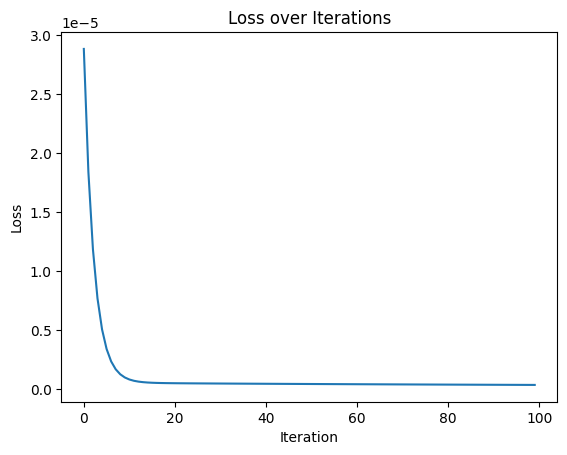

In [180]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [181]:
print(actual_history[1])
for i in range(20):
    print(actual_history[1][i+1] - actual_history[1][i])
print(pred_history[1])
for i in range(20):
    print(pred_history[1][i+1] - pred_history[1][i])

# a simple rule of same velocity and then action + 0.19 would do much much better than what this is currently finding!!

[0.17272774875164032, -0.021697547286748886, -0.21600589156150818, -0.02013552561402321, 0.1756860464811325, -0.018633749336004257, -0.2128119021654129, -0.01682025007903576, 0.17913883924484253, 0.37512993812561035, 0.5712091326713562, 0.7674129009246826, 0.5738775134086609, 0.3808824121952057, 0.18836715817451477, 0.3855157792568207, 0.193539559841156, nan, -0.21745604276657104, -0.021696746349334717, -0.21618789434432983, -0.020467376336455345, -0.21499700844287872, -0.409495085477829, -0.21385188400745392, -0.01832280494272709, -0.21305832266807556, -0.4077478349208832, -0.2122577577829361, -0.40711137652397156, -0.21176478266716003, -0.016528058797121048, -0.21156366169452667, -0.4065433442592621, -0.21131090819835663, -0.4064318537712097, -0.21133555471897125, -0.016351478174328804, 0.1786053478717804, -0.016621708869934082, 0.17853142321109772, -0.01650570146739483, -0.2114005982875824, -0.4062381386756897, -0.6011064648628235, -0.7960891127586365, -0.9912575483322144, -0.796432

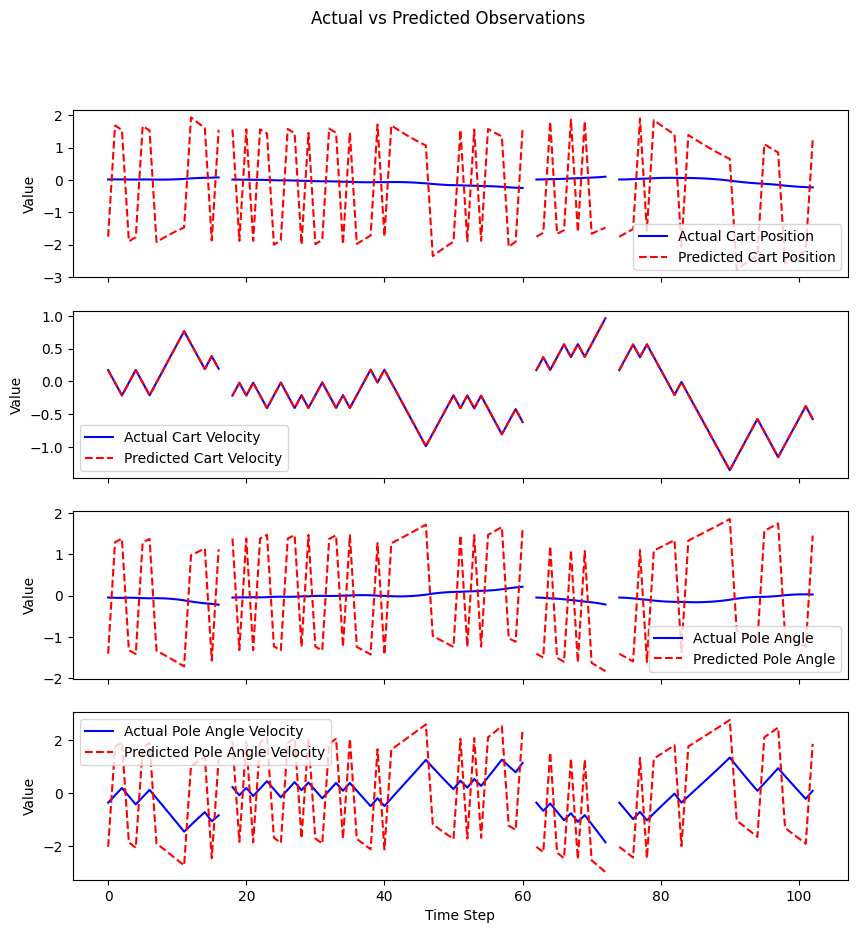

In [182]:
# Create subplots for each set of predicted and actual values
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

legend_labels = {
    1: 'Cart Position',
    2: 'Cart Velocity',
    3: 'Pole Angle',
    4: 'Pole Angle Velocity'
}

# Plot actual and predicted values for each set
for i in range(4):
    axs[i].plot(actual_history[i], color='blue', linestyle='-', label=f'Actual {legend_labels[i+1]}')
    axs[i].plot(pred_history[i], color='red', linestyle='--', label=f'Predicted {legend_labels[i+1]}')
    axs[i].set_ylabel('Value')
    axs[i].legend()

# Add labels and title
axs[-1].set_xlabel('Time Step')
plt.suptitle('Actual vs Predicted Observations')

# Show the plot
plt.show()

In [151]:
print(x_stacked[0,:].numpy())
# print(x.numpy())
w_manual = torch.tensor([0, 1, 0, 0, 0.19])
print(W[:,2].detach().numpy())
y =  x @ W
print(y)
print(x[0,:]@W[:,2])
print(x[0,:]@w_manual)

W_max = torch.max(torch.abs(W.detach()), axis=0)[0]
print(W_max)
W_normalized = W / W_max
print(W_normalized[:,0])

[-0.04458724 -0.9936341   0.01648807  1.3049414  -1.        ]
[ 2.7172697  -0.05936609  3.9957497  -0.73796165  0.312577  ]
tensor([[-2.3944,  0.6663, -1.2719,  0.5948, -2.3239,  1.5152,  0.8972, -1.3325]],
       grad_fn=<MmBackward0>)
tensor(-1.2719, grad_fn=<DotBackward0>)
tensor(-1.1836)
tensor([1.2945, 1.8201, 3.9957, 1.6728, 2.2538, 1.8653, 1.0576, 1.1459])
tensor([ 0.2110,  0.2639,  0.0362, -1.0000,  0.2736],
       grad_fn=<SelectBackward0>)


Text(0, 0.5, 'Rows')

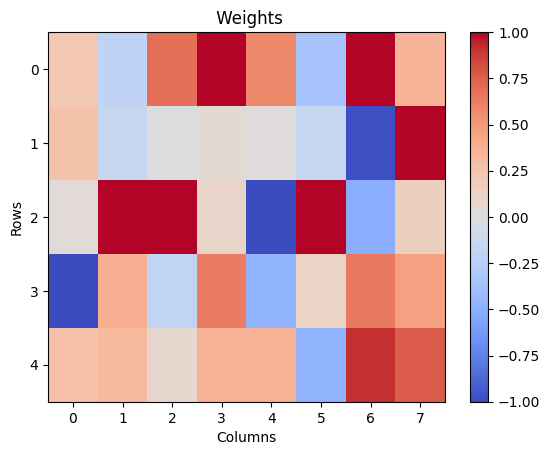

In [143]:
# plt.subplot(1, 2, 1)
plt.title(" Weights")
plt.imshow(W_normalized.detach().numpy(), cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')